In [1]:
import numpy as np
from numpy.random import RandomState
import scipy.stats as ss
import matplotlib.pyplot as plt

a) Determinar la matriz de transición de estados explicando cómo se obtiene la misma.

La matriz de transiciones tendra en la posicion $M_{i,j}$ la probabilidad de que la cantidad de usuarios se modifique de $i$ a $j$ en un minuto. Utilizamos entonces la fórmula incluida en el enunciado para calcular $P (i \rightarrow j)$ en cada posición de la matriz. En primer lugar calculamos las transiciones relacionadas a la distribución binomial, y luego utilizamos las mismas para encontrar las probabilidades de la diagonal inferior de la matriz.

In [2]:
n = 50
p = 0.7
matriz_transiciones = np.zeros((n+1, n+1))

for i in range(n + 1):
    for j in range(n + 1 - i):
        matriz_transiciones[i][j] = ss.binom.pmf(j-i, n, p)

sumatoria = np.sum(matriz_transiciones, axis=1)

for i in range(n):
    for j in range(i+1):
        matriz_transiciones[i+1][j] = (1 - sumatoria[i+1]) / (i+1)
        

Corroboramos que cada fila sume 1:

In [3]:
np.sum(matriz_transiciones, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

b) Utilizando Matlab, Octave o Python simular una posible evolución del sistema a lo largo de 100 observaciones
graficando cómo se modifica la cantidad de clientes conectados en cada momento.

Simulamos 100 observaciones, generando muestras aleatorias de distribuciones no uniformes conformes a la respectiva fila de la matriz de transiciones.

In [4]:
def simular_sistema(cantidad_transiciones, semilla):

    random_state = RandomState(semilla)
    estados = np.zeros(cantidad_transiciones + 1)

    for i in range(cantidad_transiciones):
        estados[i+1] = random_state.choice(51,1, p=matriz_transiciones[int(estados[i])])
    return estados    

In [5]:
estados = simular_sistema(100, 5)

Text(0.5, 1.0, 'Simulacion de una evolucion de la cantidad de clientes en el banco')

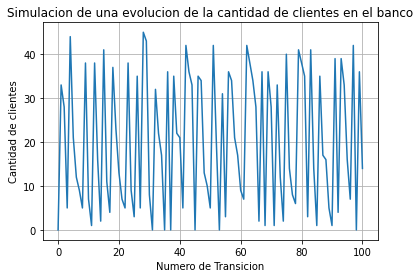

In [6]:
x = np.arange(101)
plt.plot(x, estados)
plt.xlabel('Numero de Transicion')
plt.ylabel('Cantidad de clientes')
plt.grid()
plt.title('Simulacion de una evolucion de la cantidad de clientes en el banco')

c) Simulando 100.000 observaciones realizar un histograma mostrando cuantas veces el sistema estuvo en cada
estado.

Text(0.5, 1.0, 'Histograma de la frecuencia de la cantidad de clientes conectados al banco en simultaneo')

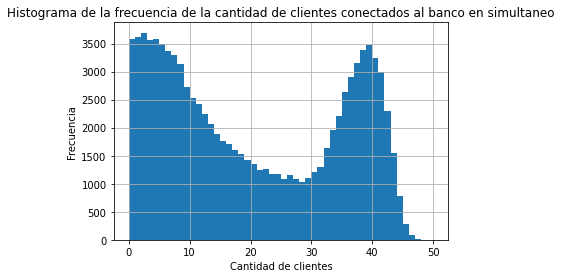

In [7]:
estados = simular_sistema(100000, 2)
plt.hist(estados, bins=np.arange(n+1))
plt.xlabel('Cantidad de clientes')
plt.ylabel('Frecuencia')
plt.grid()
plt.title('Histograma de la frecuencia de la cantidad de clientes conectados al banco en simultaneo')

In [8]:
print("El porcentaje de tiempo que el home banking no tuvo clientes conectados fue del {:.3f} %".format(np.sum(np.asarray(estados == 0) * 100 / 100000)))

El porcentaje de tiempo que el home banking no tuvo clientes conectados fue del 3.589 %


In [9]:
print("El porcentaje de tiempo que el home banking tuvo mas de 40 clientes conectados fue del {:.3f} %".format(np.sum(np.asarray(estados > 40) * 100 / 100000)))

El porcentaje de tiempo que el home banking tuvo mas de 40 clientes conectados fue del 7.995 %


Por lo tanto, se puede recomendar la migración. 